<a href="https://colab.research.google.com/github/shivajhbax/chat-messenger-android-app/blob/main/car_price_prediction_linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#importing necessary files
#numpy library for  array objects and a collection of routines for processing those arrays
import numpy as np
#pandas library used for data processing and operation tool used for data analytics
import pandas as pd 

#importing usual libraries 
#ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt  #this library used for creating static, animated, and interactive visualizations in Python
import seaborn as sns     #seaborn library underneath to plot graphs. It will be used to visualize random distributions

%matplotlib inline


In [50]:
#importing dataset cardata.csv dataset csv to pandas dataframe 

car = pd.read_csv("cardata.csv")
car.head()




,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
#checking number of rows and columns in car dataset

car.shape

(205, 26)

In [52]:
#checking summary of numeric variables

car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


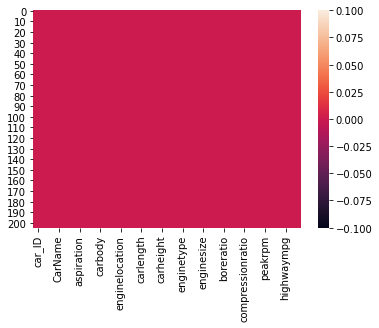

In [53]:
sns.heatmap(car.isnull())

In [54]:
#cleaning Car Name to keep only brand(company) name and remove model names 

car['CarName']=car['CarName'].apply(lambda x:x.split(' ', 1)[0])
car.rename(columns = {'CarName':'companyname'}, inplace = True)
car.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
#checking unique values in company name column

car.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [56]:
'''Invalid Values

There is some inconsistency in the spellings of company names, which needs to be fixed. We need to do the following replacements:

maxda -> mazda
Nissan -> nissan
porcshce -> porsche
toyouta -> toyota
vokswagen -> volkswagen
vw -> volkswagen'''

# Fixing values in company name

car.companyname = car.companyname.str.lower()

def replace_name(a,b):
    car.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

car.companyname.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

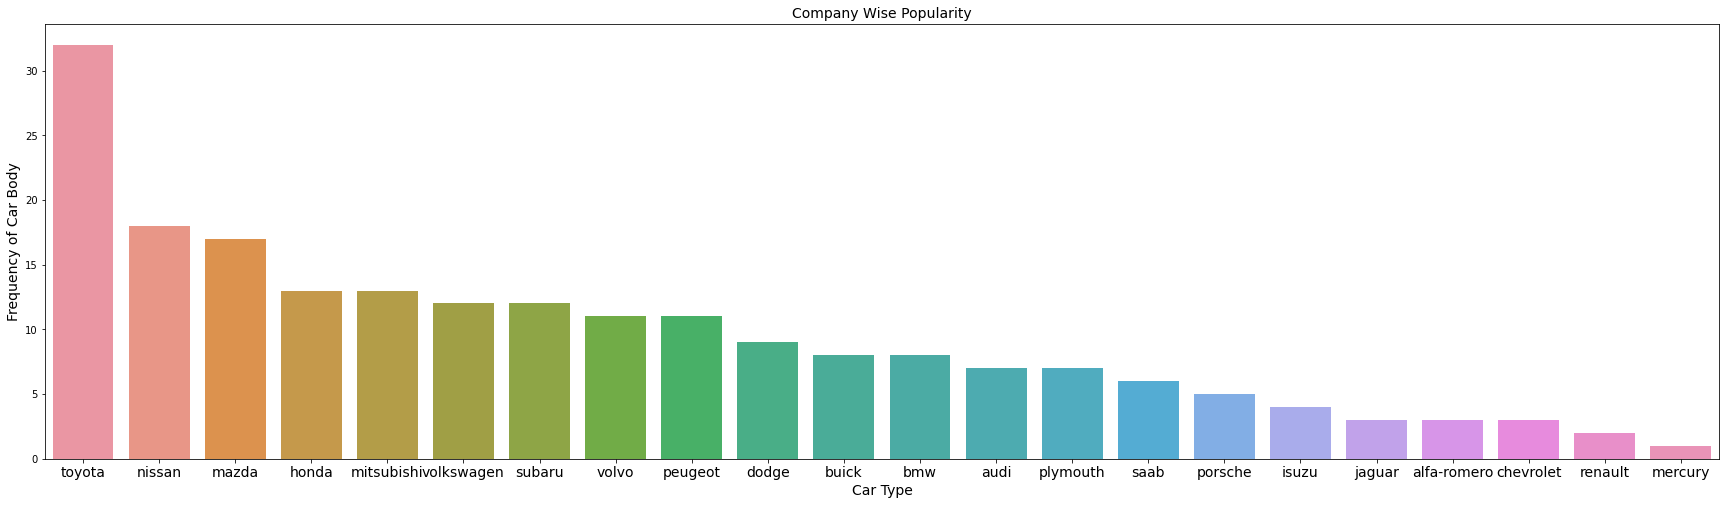

In [57]:
#plotting count of company names

plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=car.companyname, data=car, order= car.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car Type', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

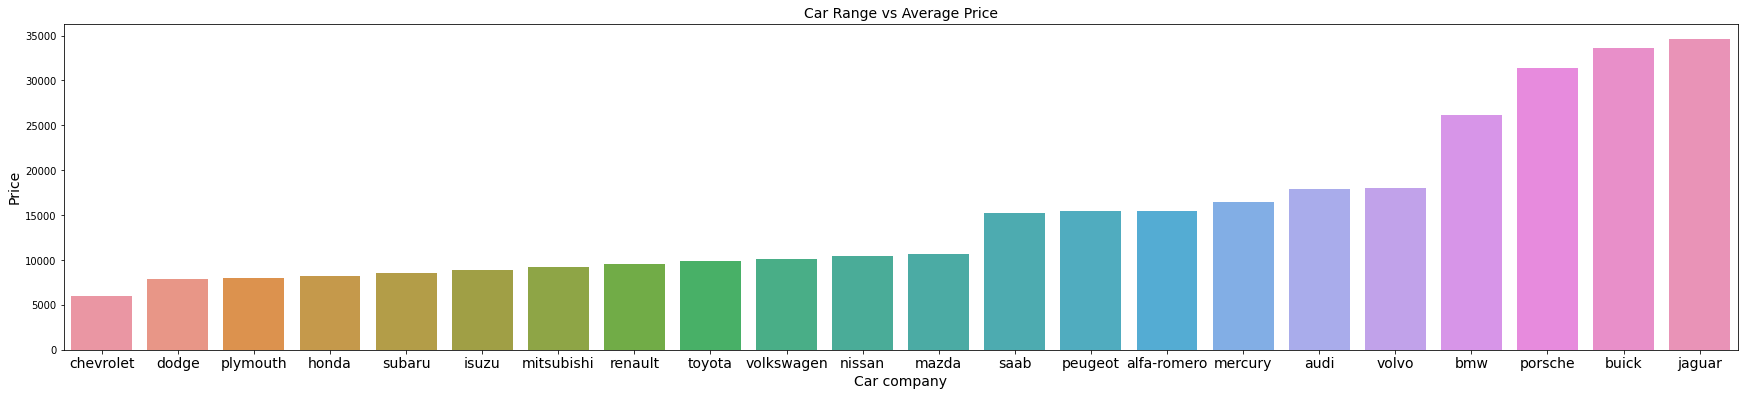

In [58]:
#plotting company wise average price of car

plt.figure(figsize=(30, 6))

df = pd.DataFrame(car.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

In [59]:
'''Chevrolet has the cheapest average price amongst all companies.
Jaguar has the highest average price.
The avg price seems to be dependant on the company name and this is an indicator that we can use this variable in our model because it shows correlation with car price
Now, since the number of companies are too many and it would create a lot of dummy variables, lets divide these companies into segments based on their avg price.'''


#Binning the Car Companies based on avg prices of each Company.

def replace_values(a,b):
    car.companyname.replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

car.rename(columns = {'companyname':'segment'}, inplace = True)
car.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


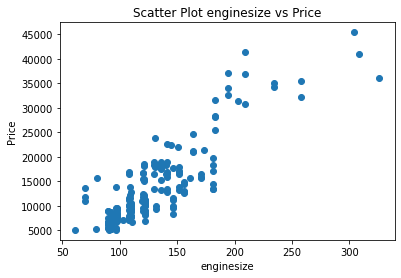

In [60]:
plt.scatter(car['enginesize'], car['price'])
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Scatter Plot enginesize vs Price')
plt.show()

In [61]:
car.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import math 

In [63]:
# Prepare data
# Pertama, buat variabel x dan y.
x = car['enginesize'].values.reshape(-1,1)
y = car['price'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[168.17363122]]
[-8037.06049611]


In [64]:
regressor.score(x_test, y_test)

0.8068161903454086

In [66]:
print('Correlation: ', math.sqrt(regressor.score(x_test,y_test)))

Correlation:  0.8982294753265496


Text(0.5, 1.0, 'Plot enginesize vs Price')

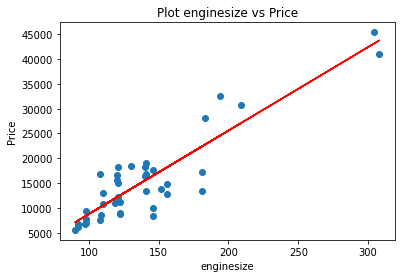

In [67]:
y_prediksi = regressor.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Plot enginesize vs Price')

In [68]:
#Prediksi harga mobil dengan enginesize 130.
prediction=int(input())
regressor.predict([[prediction]])

130


array([[13825.51156222]])

In [70]:
np_table = np.concatenate((x_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['x_test','y_test','y_predict'])

In [71]:
new_dataframe

,x_test,y_test,y_predict
0,98.0,7738.0,8443.955363
1,109.0,8495.0,10293.865307
2,122.0,8845.0,12480.122512
3,98.0,9298.0,8443.955363
4,108.0,7603.0,10125.691675
5,122.0,11245.0,12480.122512
6,130.0,18420.0,13825.511562
7,140.0,16503.0,15507.247874
8,146.0,17669.0,16516.289662
9,181.0,17199.0,22402.366754


In [72]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi)))

Mean Absolute Error: 3123.611515387693
Mean Squared Error: 14882644.972928163
Root Mean Squared Error: 3857.8031278083854


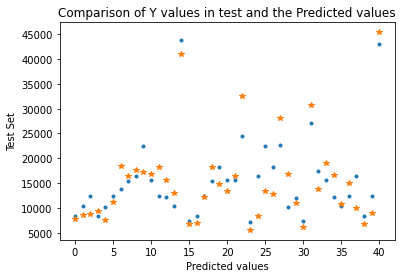

In [73]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, '*')
plt.show()


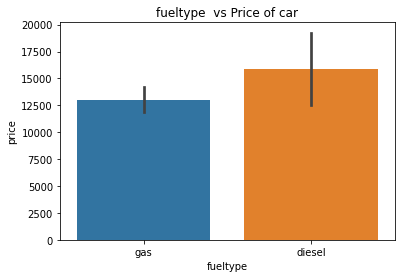

In [74]:
plt.subplot(111)
plt.title('fueltype  vs Price of car')

sns.barplot(x=car.fueltype, y=car.price)
    
plt.show()   

Text(0, 0.5, 'Car price')

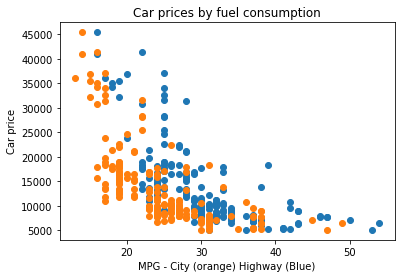

In [75]:
plt.scatter(car['highwaympg'], car['price'])
plt.scatter(car['citympg'], car['price'])
plt.title('Car prices by fuel consumption')
plt.xlabel('MPG - City (orange) Highway (Blue)')
plt.ylabel('Car price')

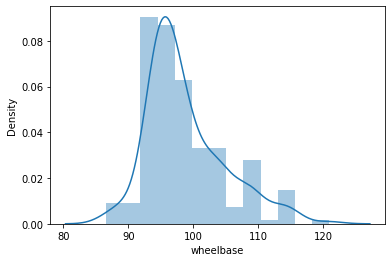

In [76]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(car['wheelbase'])
plt.show()

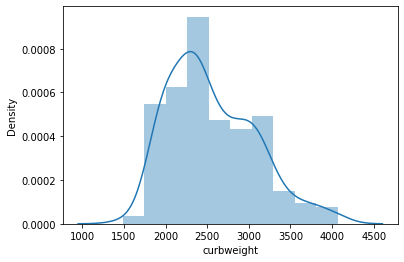

In [77]:
# curbweight: weight of car without occupants or baggage
sns.distplot(car['curbweight'])
plt.show()

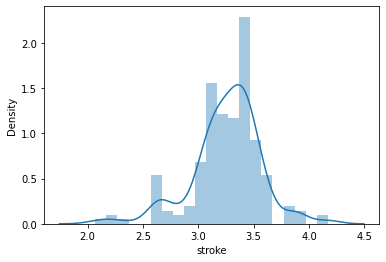

In [78]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(car['stroke'])
plt.show()


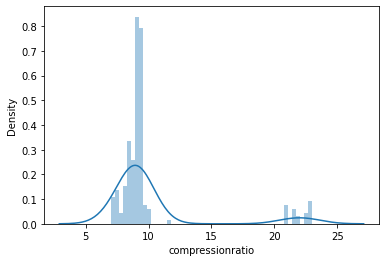

In [79]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(car['compressionratio'])
plt.show()

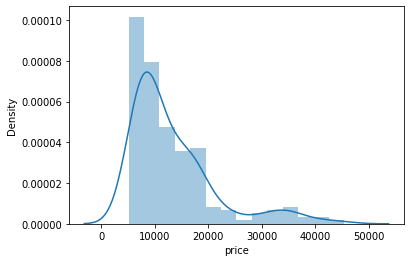

In [80]:
# target variable: price of car
sns.distplot(car['price'])
plt.show()